Plot MPA-95 vs Batchsize..   8-960, 8-1024 not showing

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os


In [10]:
# Load the CSV files
pythonCopymodel8_416 = pd.read_csv('exel/8-416/results.csv')
model8_512 = pd.read_csv('exel/8-512/results.csv')
model8_640 = pd.read_csv('exel/8-640/results.csv')
model8_960 = pd.read_csv('exel/8-960/results.csv') #!!
model8_1024 = pd.read_csv('exel/8-1024/results.csv') #!!

model16_416 = pd.read_csv('exel/16-416/results.csv')
model16_512 = pd.read_csv('exel/16-512/results.csv')
model16_640 = pd.read_csv('exel/16-640/results.csv')
model16_960 = pd.read_csv('exel/model-16-960/results.csv')
model16_1024 = pd.read_csv('exel/model-16-1024/results.csv')

model32_416 = pd.read_csv('exel/32-416/results.csv')
model32_512 = pd.read_csv('exel/32-512/results.csv')
model32_640 = pd.read_csv('exel/32-640/results.csv')
model32_960 = pd.read_csv('exel/model-32-960/results.csv')
model32_1024 = pd.read_csv('exel/model-32-1024/results.csv')

model64_416 = pd.read_csv('exel/64-416/results.csv')
model64_512 = pd.read_csv('exel/64-512/results.csv')
model64_640 = pd.read_csv('exel/model-64-640/results.csv')
model64_960 = pd.read_csv('exel/model-64-960/results.csv')
model64_1024 = pd.read_csv('exel/model-64-1024/results.csv')

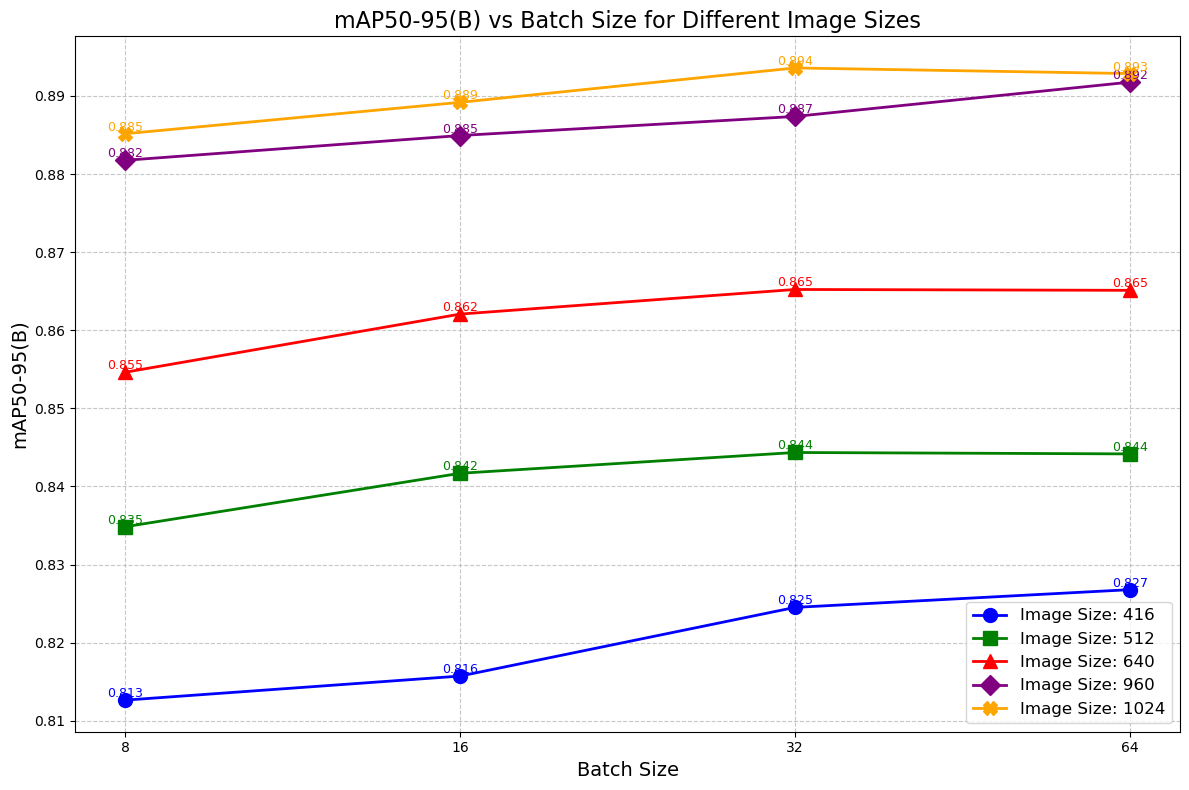

In [25]:
batch_sizes = [8, 16, 32, 64]
image_sizes = [416, 512, 640, 960, 1024]

def extract_map(df):
    map_column = [col for col in df.columns if 'metrics/mAP50-95(B)' in col or 'mAP50-95' in col]
    return df[map_column[0]].max()     
map_values = {}

for batch in batch_sizes:
    map_values[batch] = {}
    for size in image_sizes:
        if batch in [8, 16, 32]:
            if size in [416, 512, 640]:
                path = f'exel/{batch}-{size}/results.csv'
            elif (batch == 8 and size == 960) or (batch == 8 and size == 1024) :
                path = f'exel/{batch}-{size}/results.csv'
            else:
                path = f'exel/model-{batch}-{size}/results.csv'
        else:  # batch size 64
            if size in [416, 512]:
                path = f'exel/{batch}-{size}/results.csv'
            else:
                path = f'exel/model-{batch}-{size}/results.csv'
        df = pd.read_csv(path)
        map_values[batch][size] = extract_map(df)

x = batch_sizes
y_values = {size: [] for size in image_sizes}

for size in image_sizes:
    for batch in batch_sizes:
        y_values[size].append(map_values[batch][size])

plt.figure(figsize=(12, 8))

colors = ['blue', 'green', 'red', 'purple', 'orange']
markers = ['o', 's', '^', 'D', 'X']

for i, size in enumerate(image_sizes):
    plt.plot(x, y_values[size], marker=markers[i], linestyle='-', color=colors[i], 
             linewidth=2, markersize=10, label=f'Image Size: {size}')

plt.xscale('log', base=2)
plt.xticks(batch_sizes, [str(b) for b in batch_sizes])

plt.xlabel('Batch Size', fontsize=14)
plt.ylabel('mAP50-95(B)', fontsize=14)
plt.title('mAP50-95(B) vs Batch Size for Different Image Sizes', fontsize=16)

plt.grid(True, linestyle='--', alpha=0.7)

plt.legend(fontsize=12)

for i, size in enumerate(image_sizes):
    for j, batch in enumerate(batch_sizes):
        if not np.isnan(y_values[size][j]):
            plt.text(batch, y_values[size][j], f'{y_values[size][j]:.3f}', 
                     ha='center', va='bottom', fontsize=9, color=colors[i])

plt.tight_layout()
plt.savefig('map_vs_batch_size.png', dpi=300)
plt.show()

table_data = {f'Batch={b}': [map_values[b][s] for s in image_sizes] for b in batch_sizes}
table_df = pd.DataFrame(table_data, index=[f'Size={s}' for s in image_sizes])

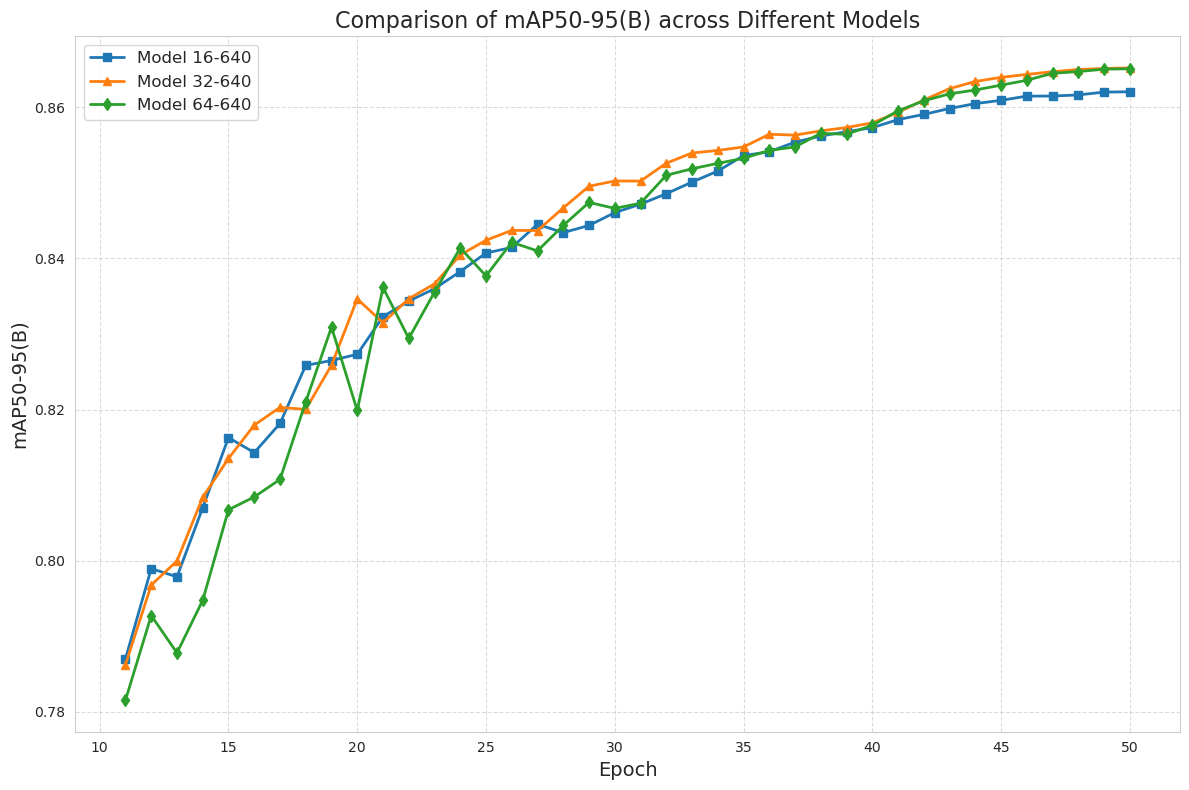

In [8]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

plt.plot(model16_640['epoch'][10:], model16_640['metrics/mAP50-95(B)'][10:], 's-', linewidth=2, label='Model 16-640')
plt.plot(model32_640['epoch'][10:], model32_640['metrics/mAP50-95(B)'][10:], '^-', linewidth=2, label='Model 32-640')
plt.plot(model64_640['epoch'][10:], model64_640['metrics/mAP50-95(B)'][10:], 'd-', linewidth=2, label='Model 64-640')

plt.xlabel('Epoch', fontsize=14)
plt.ylabel('mAP50-95(B)', fontsize=14)
plt.title('Comparison of mAP50-95(B) across Different Models', fontsize=16)

plt.legend(fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

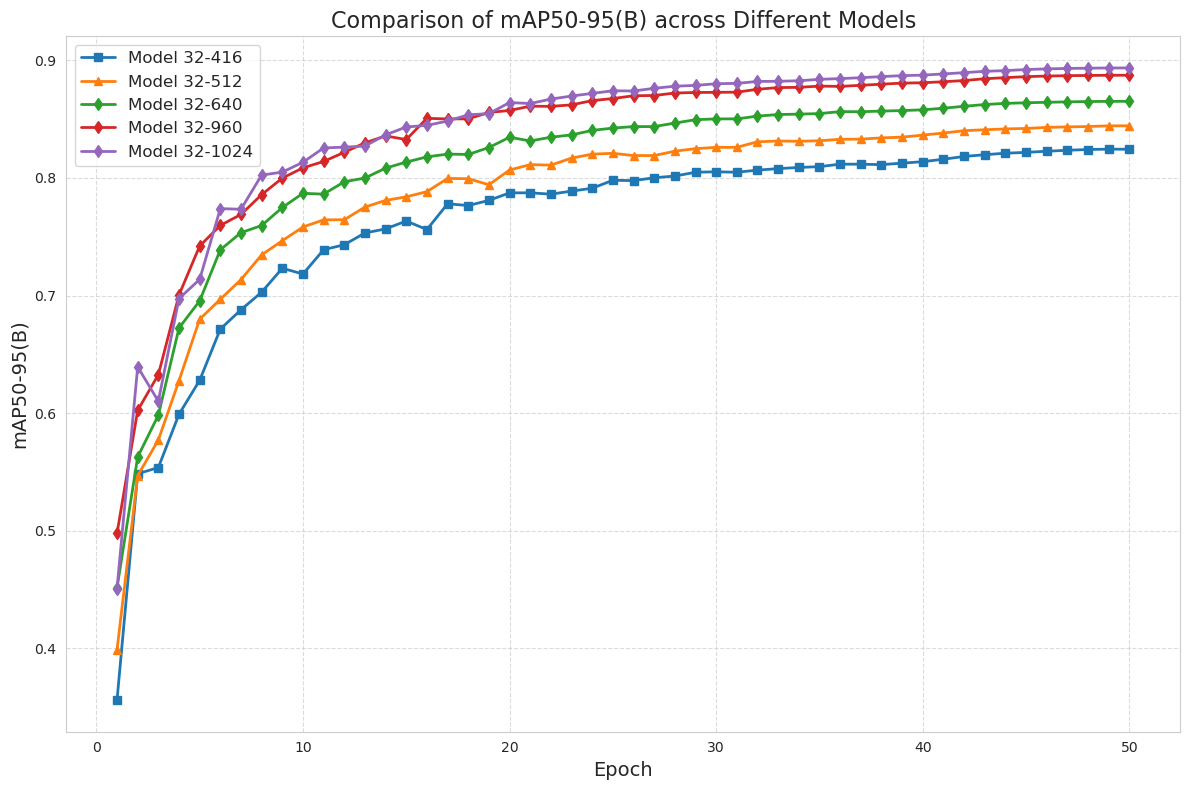

In [10]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
plt.plot(model32_416['epoch'], model32_416['metrics/mAP50-95(B)'], 's-', linewidth=2, label='Model 32-416')
plt.plot(model32_512['epoch'], model32_512['metrics/mAP50-95(B)'], '^-', linewidth=2, label='Model 32-512')
plt.plot(model32_640['epoch'], model32_640['metrics/mAP50-95(B)'], 'd-', linewidth=2, label='Model 32-640')
plt.plot(model32_960['epoch'], model32_960['metrics/mAP50-95(B)'], 'd-', linewidth=2, label='Model 32-960')
plt.plot(model32_1024['epoch'], model32_1024['metrics/mAP50-95(B)'], 'd-', linewidth=2, label='Model 32-1024')

plt.xlabel('Epoch', fontsize=14)
plt.ylabel('mAP50-95(B)', fontsize=14)
plt.title('Comparison of mAP50-95(B) across Different Models', fontsize=16)
plt.legend(fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()